In [1]:
import pandas as pd
import matplotlib.pyplot as plt #3.4
import seaborn as sns
colors = sns.color_palette("tab10")
sns.set_theme()
import re


In [2]:
metrics = ['fit_time_mean', 'fit_time_std', 'predict_time_mean',
       'predict_time_std', 'train_accuracy_score_mean',
       'train_accuracy_score_std', 'train_f1_score_mean', 'train_f1_score_std',
       'train_roc_auc_score_mean', 'train_roc_auc_score_std',
       'valid_accuracy_score_mean', 'valid_accuracy_score_std',
       'valid_f1_score_mean', 'valid_f1_score_std', 'valid_roc_auc_score_mean',
       'valid_roc_auc_score_std', 'training_size']

In [3]:
count_df = pd.read_csv('results/first_cross_validation/count.csv')
tfidf_df = pd.read_csv('results/first_cross_validation/tfidf.csv')


In [4]:

result_count = count_df[['model'] + metrics]
result_count.model = result_count.model.apply(lambda text: re.sub(r'\([^)]*\)', '', text.lower()).replace('classifier',''))

result_tfidf = tfidf_df[['model'] + metrics]
result_tfidf.model = result_tfidf.model.apply(lambda text: re.sub(r'\([^)]*\)', '', text.lower()).replace('classifier',''))

/Users/gonthierlucas/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [5]:
result_count

,model,fit_time_mean,fit_time_std,predict_time_mean,predict_time_std,train_accuracy_score_mean,train_accuracy_score_std,train_f1_score_mean,train_f1_score_std,train_roc_auc_score_mean,train_roc_auc_score_std,valid_accuracy_score_mean,valid_accuracy_score_std,valid_f1_score_mean,valid_f1_score_std,valid_roc_auc_score_mean,valid_roc_auc_score_std,training_size
0,mlp,383.799100,12.907965,1.630635,0.172097,0.999994,0.000013,0.999994,0.000013,0.999994,0.000012,0.890025,0.004107,0.890535,0.004252,0.890100,0.004140,32000
1,linearsvc,12.676241,0.277918,1.474132,0.036494,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.870750,0.001992,0.871140,0.002465,0.870809,0.002057,32000
2,randomforest,8.878690,0.263008,1.643633,0.085206,0.871494,0.003669,0.875166,0.003021,0.872948,0.003264,0.830575,0.003770,0.834756,0.003791,0.831558,0.003831,32000
3,multinomialnb,7.291926,0.207373,1.445070,0.043604,0.910881,0.000468,0.907952,0.000506,0.912391,0.000452,0.847600,0.002095,0.843163,0.002532,0.848598,0.001944,32000
4,decisiontree,12.031633,0.186447,1.438754,0.028081,0.774819,0.003339,0.791594,0.009406,0.784432,0.009364,0.728950,0.003891,0.749508,0.008707,0.737019,0.006626,32000
5,logisticregression,9.525753,0.330825,1.441475,0.030953,0.979394,0.006687,0.979380,0.006692,0.979397,0.006688,0.887000,0.003398,0.887216,0.003672,0.887037,0.003434,32000


# Cross validation with Count Vectorizer

## Train accuracy vs Valid accuracy

Below, the results of the first 5-fold cross-validation for each of the models with accuracy as metric. The hyperparameters are the default ones from **scikit-learn**, except for the decision tree and the random forest for which we set the maximum depth to avoid overfitting. The vectorizer used is a Count Vectorizer.

For the average of the **accuracy** :
- We notice that all the models have an accuracy of the validation set higher than **80%**, except the decision tree (about **70%**).
- However, we notice that the MLP and the linear SVC are particularly performing on the training set with an accuracy of respectively **99.99%** (validation of 89.00%) and **100%** (validation of 87.07%). This is a sign of overfitting.
- The logistic regression also has a high training **accuracy** **97.93%** compared to its validation accuracy **88.70**.

Regarding the **standard deviation of the accuracy**: 
- Most models have a fairly low standard deviation on both the training and validation sets.
- Only the logistic regression has a standard deviation of almost 0.007, but this is not alarming for the moment.


In [6]:
result_count[['model', 'train_accuracy_score_mean', 'valid_accuracy_score_mean', 'train_accuracy_score_std', 'valid_accuracy_score_std']]

,model,train_accuracy_score_mean,valid_accuracy_score_mean,train_accuracy_score_std,valid_accuracy_score_std
0,mlp,0.999994,0.890025,0.000013,0.004107
1,linearsvc,1.000000,0.870750,0.000000,0.001992
2,randomforest,0.871494,0.830575,0.003669,0.003770
3,multinomialnb,0.910881,0.847600,0.000468,0.002095
4,decisiontree,0.774819,0.728950,0.003339,0.003891
5,logisticregression,0.979394,0.887000,0.006687,0.003398


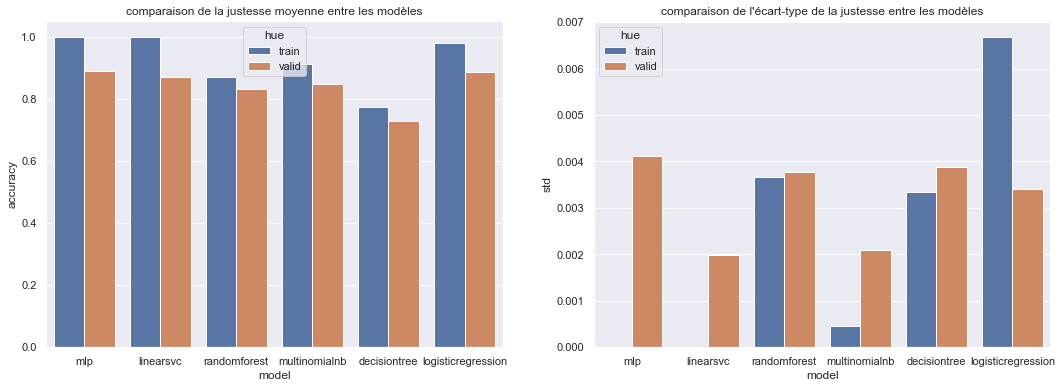

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
transfer = pd.DataFrame({'model':result_count.model.to_list()*2, 'accuracy':result_count['train_accuracy_score_mean'].to_list()+result_count[ 'valid_accuracy_score_mean'].to_list(),
             'std':result_count['train_accuracy_score_std'].to_list()+result_count[ 'valid_accuracy_score_std'].to_list(),
                        'hue':['train']*6 + ['valid']*6})

sns.barplot(data=transfer, x='model', y='accuracy', hue='hue', ax=ax1)

sns.barplot(data=transfer, x='model', y='std', hue='hue', ax=ax2)

#Générer le graphe avec les valeurs sur un env différent (juste pour le rapport)!
#Only available with matoplotlib 3.4 and python 3.7 required..
#for container in ax.containers:
#    ax.bar_label(container)
    
ax1.set_title('comparaison de la justesse moyenne entre les modèles')
ax2.set_title('comparaison de l\'écart-type de la justesse entre les modèles')


plt.show()

# Cross Validation with Tfidf Vectorizer

## Train accuracy vs Validation accuracy

Below, the results of the first 5-fold cross-validation for each of the models with accuracy as metric. The hyperparameters are the default ones from scikit-learn, except for the decision tree and the random forest for which we set the maximum depth to avoid overfitting. The vectorizer used is a Tfidf vectorizer.

For the average of the **average accuracy** :
- We notice that all the models have an accuracy of the validation set higher than **80%**, except the decision tree (about **70%**).
- However, we notice that the MLP and the SVC are particularly performing on the training set with an accuracy of respectively **99.16%** (validation of 88.70%) and **100** (89.84%). This is a sign of overfitting.
- We can note that the accuracy of the logistic regression on the training data is much lower, **93.26%** for validation accuracy **89.16**.

Concerning the **standard deviation of the accuracy** : 
- We notice that no model, either on the training or on the validation, exceeds **0.0045** contrary to the cross-validation with Count Vectorizer.

In [9]:
result_tfidf[['model', 'train_accuracy_score_mean', 'valid_accuracy_score_mean', 'train_accuracy_score_std', 'valid_accuracy_score_std']]

,model,train_accuracy_score_mean,valid_accuracy_score_mean,train_accuracy_score_std,valid_accuracy_score_std
0,mlp,1.000000,0.887075,0.000000,0.002746
1,linearsvc,0.991637,0.898425,0.000307,0.003361
2,randomforest,0.879250,0.825525,0.003994,0.004007
3,multinomialnb,0.915069,0.861750,0.000522,0.000848
4,decisiontree,0.777762,0.726850,0.002547,0.003220
5,logisticregression,0.932638,0.891675,0.000499,0.003159


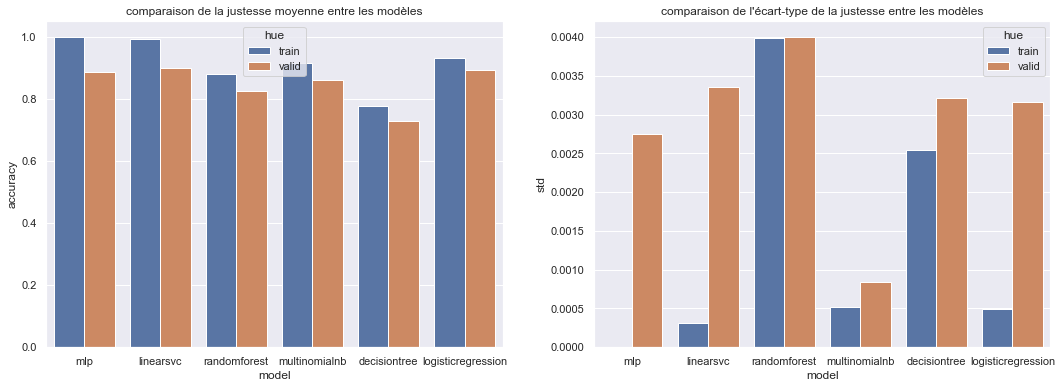

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
transfer = pd.DataFrame({'model':result_tfidf.model.to_list()*2, 'accuracy':result_tfidf['train_accuracy_score_mean'].to_list()+result_tfidf[ 'valid_accuracy_score_mean'].to_list(),
             'std':result_tfidf['train_accuracy_score_std'].to_list()+result_tfidf[ 'valid_accuracy_score_std'].to_list(),
                        'hue':['train']*6 + ['valid']*6})

sns.barplot(data=transfer, x='model', y='accuracy', hue='hue', ax=ax1)

sns.barplot(data=transfer, x='model', y='std', hue='hue', ax=ax2)

#Générer le graphe avec les valeurs sur un env différent (juste pour le rapport)!
#Only available with matoplotlib 3.4 and python 3.7 required..
#for container in ax.containers:
#    ax.bar_label(container)
    
ax1.set_title('comparaison de la justesse moyenne entre les modèles')
ax2.set_title('comparaison de l\'écart-type de la justesse entre les modèles')

plt.show()

## Conclusion de la première cross validation :

The results remain globally similar whether with the CountVectorizer or the TfidfVectorizer. In the following, we will perform a hyperparameter search. Our goal will be to find the best possible hyperparameters for each model. Ideally, we could also include the search for other pipeline parameters, this would ensure even better results. However, the current results are quite good. Moreover, adding the other pipeline parameters would add too much computation time. We will also try to reduce the overfitting of MLP and linearSVC.